In [1]:
# Imports

import numpy as np
import scipy
import matplotlib.pyplot as plt
import utils

# %matplotlib tk
%matplotlib inline

In [2]:
# Create arrays of note names and corresponding intervals (relative to A0)

scale : list[str] = ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"]

notes : list[str]= []

for i in range(8):
    for note in scale:
        notes.append(f"{note}{i}")

notes : np.ndarray = np.array(notes)
intervals : np.ndarray = np.arange(notes.shape[0])

In [3]:
# Get cross correlation values

constant_note_index : int = 85
constant_note_name : str = notes[constant_note_index]

sampling_freq, sound1 = utils.load_sound_mono(f"samples/{constant_note_name}.wav")

intervals -= constant_note_index

delays : np.ndarray = np.zeros_like(notes, dtype=np.float64)
values : np.ndarray = np.zeros_like(notes, dtype=np.float64)
lengths : np.ndarray = np.zeros_like(notes, dtype=np.float64)

for i in range(notes.shape[0]):
    current_note_name : str = notes[i]
    
    try:
        sampling_freq, sound2 = utils.load_sound_mono(f"samples/{current_note_name}.wav")

        effective_sampling_freq, cross_correlation = utils.get_cross_correlation_spectrogram(sound1, sound2, sampling_freq, time_resolution=.1, freq_resolution=1)
        delay, value = utils.get_delay(cross_correlation, effective_sampling_freq)

        delays[i] = delay
        values[i] = value
        lengths[i] = (sound2.shape[0]) / sampling_freq

        print(f"Completed {current_note_name} at index {i}")

    except FileNotFoundError:
        print(f"No file for note {current_note_name}")

Completed A0 at index 0
Completed A#0 at index 1
Completed B0 at index 2
No file for note C0
No file for note C#0
No file for note D0
No file for note D#0
No file for note E0
No file for note F0
No file for note F#0
No file for note G0
Completed G#0 at index 11
Completed A1 at index 12
No file for note A#1
No file for note B1
Completed C1 at index 15
No file for note C#1
No file for note D1
Completed D#1 at index 18
Completed E1 at index 19
Completed F1 at index 20
Completed F#1 at index 21
Completed G1 at index 22
Completed G#1 at index 23
Completed A2 at index 24
Completed A#2 at index 25
Completed B2 at index 26
Completed C2 at index 27
Completed C#2 at index 28
Completed D2 at index 29
Completed D#2 at index 30
Completed E2 at index 31
Completed F2 at index 32
No file for note F#2
No file for note G2
Completed G#2 at index 35
Completed A3 at index 36
Completed A#3 at index 37
Completed B3 at index 38
Completed C3 at index 39
Completed C#3 at index 40
Completed D3 at index 41
No fil

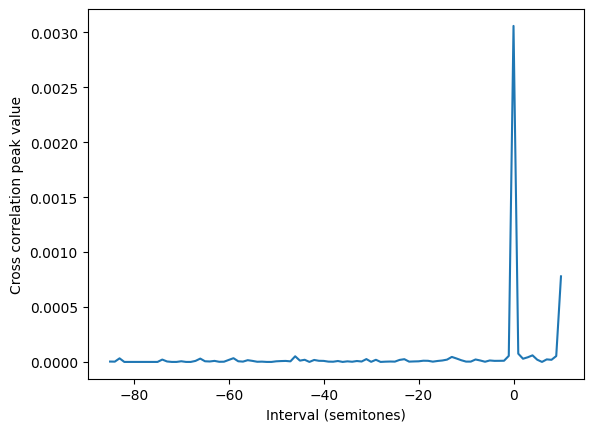

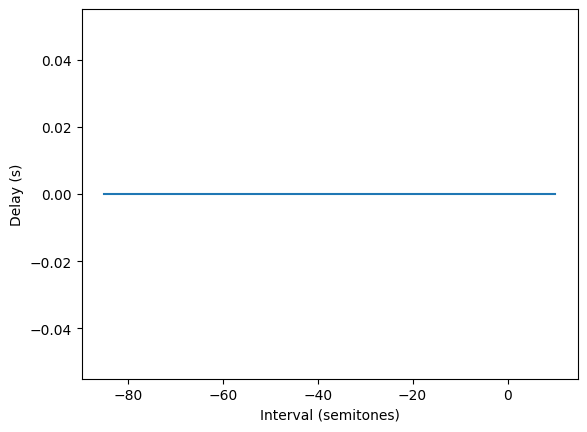

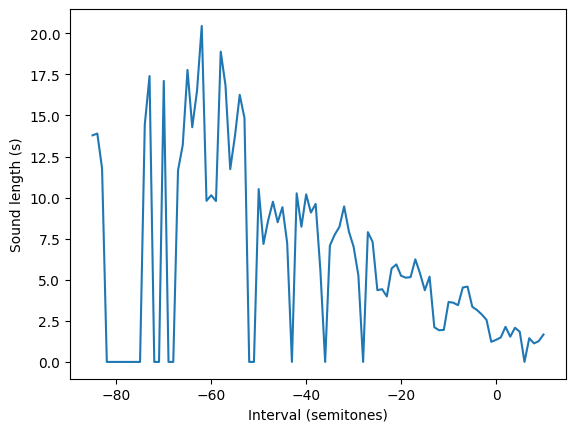

In [4]:
# Plot delays and values

plt.figure()
plt.plot(intervals, values)
plt.xlabel("Interval (semitones)")
plt.ylabel("Cross correlation peak value")
plt.show()

plt.figure()
plt.plot(intervals, delays)
plt.xlabel("Interval (semitones)")
plt.ylabel("Delay (s)")
plt.show()

plt.figure()
plt.plot(intervals, lengths)
plt.xlabel("Interval (semitones)")
plt.ylabel("Sound length (s)")
plt.show()